In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [2]:
canada_path = "canada_project/data/canada_data.csv"
canada_data = pd.read_csv(canada_path)
#canada_data

In [3]:
#canada count test chunk (does not reflect all revisions)
#canada_rev3.count()

In [4]:
#drop blank columns
canada_rev1 = canada_data.drop(["SYMBOL", "TERMINATED"], axis=1)
#drop "duplicate" or not useful info
canada_rev2 = canada_rev1.drop(["DGUID", "SCALAR_ID", "UOM_ID", "REF_DATE", "DECIMALS"], axis=1) #STATUS column's purpose unknown at this point
#setting COORDINATE to index
canada_rev3 = canada_rev2.set_index("COORDINATE")
#extra for viewing
canada_rev4 = canada_rev3.copy()

In [5]:
#fill missing values in VALUE and STATUS (while STATUS still exists)
canada_rev4["VALUE"] = canada_rev4["VALUE"].fillna("N/A")
#canada_rev4["STATUS"] = canada_rev4["STATUS"].fillna("N/A") #this one looks stupid on further examination

In [6]:
#making csv to view in excel
canada_rev3.to_csv("canada_project/data/canada_rev3.csv", index=True, header=True)
canada_rev4.to_csv("canada_project/data/canada_rev4.csv", index=True, header=True)

In [7]:
#sort into two different dfs: one for percents values and one for raw numbers
canada_percent = canada_rev3[canada_rev3["UOM"] != "Persons"]
canada_persons = canada_rev3[canada_rev3["UOM"] != "Percent"]

In [8]:
#something to play around with; I think it may be useful in early parts of the report; feel free to delete which would be less useful
canada_persons_total = canada_persons[canada_persons["Response"] == "Total, job satisfaction"]
canada_percent_total = canada_percent[canada_percent["Response"] == "Total, job satisfaction"]
canada_persons_total

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.2.1.1,Canada,"Total, 15 years and over",Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319031,7889.0,NaN
1.1.3.1.1,Canada,"Total, 15 years and over",Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116319059,7278.0,NaN
1.2.1.1.1,Canada,15 to 24 years,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319087,2000.0,NaN
1.2.2.1.1,Canada,15 to 24 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319115,982.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.9.2.1.1,British Columbia,65 to 74 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116759169,24.0,E
6.9.3.1.1,British Columbia,65 to 74 years,Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116759205,26.0,E
6.10.1.1.1,British Columbia,75 years and over,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116759241,NaN,F


In [9]:
provinces = canada_rev3[(canada_rev3["GEO"] != "Canada") & (canada_rev3["GEO"] != "Atlantic provinces") & 
                        (canada_rev3["GEO"] != "Prairie provinces")]
#one graphic should be the population distribution of responses; I have an idea but its late so I shouldn't go further 

In [10]:
#canada_persons_no_f = canada_percent = canada_rev3[canada_rev3["STATUS"] != "F"]
#canada_persons_no_f["GEO"].value_counts()
#this is just extra stuff

In [11]:
#setting up for question 4 i guess
provinces_percent = provinces[provinces["Estimates"] == "Percentage of persons"]
pro_per_2 = provinces_percent[(provinces_percent["Sex"] == "Both sexes") & 
                              (provinces_percent["Response"] != "Total, job satisfaction") &
                             (provinces_percent["Age group"] == "Total, 15 years and over")]
pro_per_3 = pro_per_2[(pro_per_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                              (provinces_people["Response"] != "Total, job satisfaction") &
                             (provinces_people["Age group"] == "Total, 15 years and over")]
pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

C:\Users\epicr\AppData\Local\Temp\ipykernel_7828\852431041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
C:\Users\epicr\AppData\Local\Temp\ipykernel_7828\852431041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)


In [12]:
#again, just to get a separate viewing window
pro_per_3.to_csv("canada_project/data/province_percent.csv", index=True, header=True)
pro_ple_3.to_csv("canada_project/data/province_people.csv", index=True, header=True)

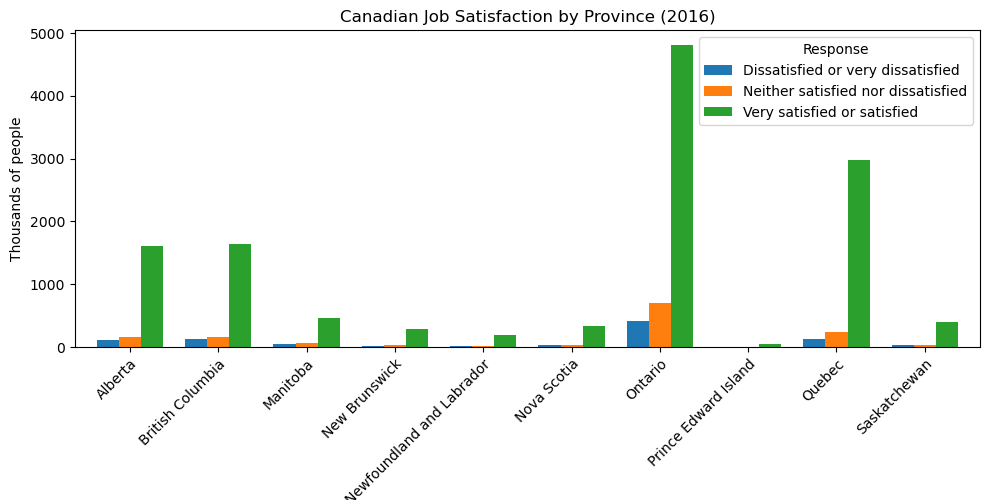

In [13]:
#plot involving the raw numbers
pro_ple_plot1 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),
                                title="Canadian Job Satisfaction by Province (2016)",
                                xlabel="Province", ylabel="Thousands of people", width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar.png")
plt.show()

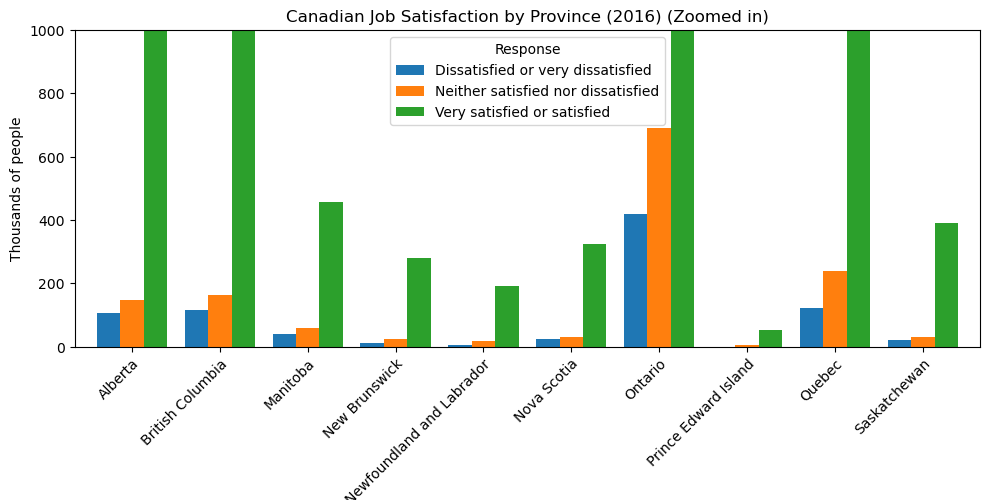

In [14]:
#above plot but zoomed in because of the sheer difference in values
pro_ple_plot2 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),
                                title="Canadian Job Satisfaction by Province (2016) (Zoomed in)",xlabel="Province", 
                                ylabel="Thousands of people", width=0.8, ylim=[0,1000])
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar_zoom.png")
plt.show()

In [15]:
#these two are show per the presentation as a means of showing how much data has been collected,
#and how, by province, some may be gravely overshadowed in numbers, hence the importance of the
#addition of percents in the VALUE column

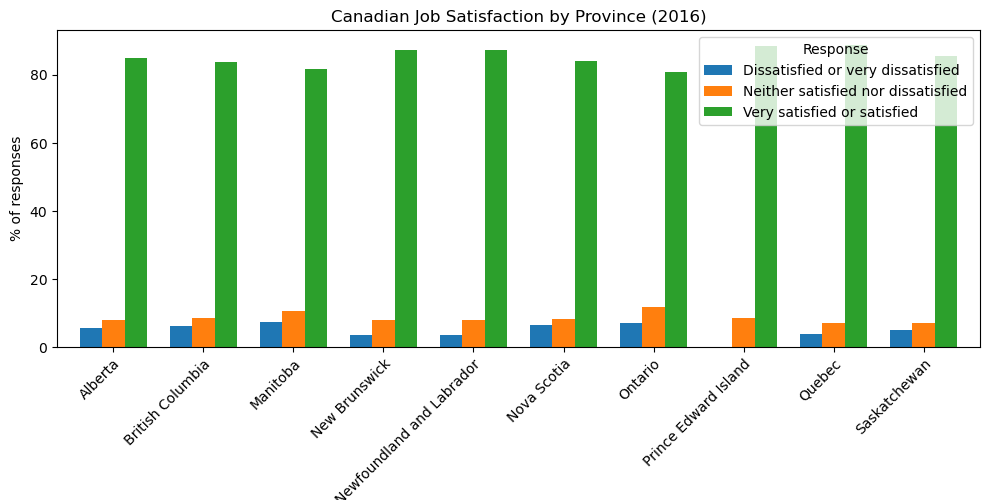

In [16]:
#a better representation of the data: the percent values
pro_per_plot = pro_per_3.pivot(index="GEO", columns="Response", 
                               values="VALUE").plot(kind="bar", figsize=(10,5),
                               title="Canadian Job Satisfaction by Province (2016)",
                               xlabel="Province", ylabel="% of responses", width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar_percent.png")
plt.show()

In [17]:
#some statistical spitballing
anova_thing = provinces_percent.groupby(["GEO", "Response", "VALUE"], group_keys=False).apply(lambda x: x.sample(1))

group0 = (anova_thing[anova_thing["GEO"] == "Alberta"]["VALUE"])
group1 = (anova_thing[anova_thing["GEO"] == "British Columbia"]["VALUE"])
group2 = (anova_thing[anova_thing["GEO"] == "Manitoba"]["VALUE"])
group3 = (anova_thing[anova_thing["GEO"] == "New Brunswick"]["VALUE"])
group4 = (anova_thing[anova_thing["GEO"] == "Newfoundland and Labrador"]["VALUE"])
group5 = (anova_thing[anova_thing["GEO"] == "Nova Scotia"]["VALUE"])
group6 = (anova_thing[anova_thing["GEO"] == "Ontario"]["VALUE"])
group7 = (anova_thing[anova_thing["GEO"] == "Prince Edward Island"]["VALUE"])
group8 = (anova_thing[anova_thing["GEO"] == "Quebec"]["VALUE"])
group9 = (anova_thing[anova_thing["GEO"] == "Saskatchewan"]["VALUE"])

In [18]:
#check for normality
model1 = ols("VALUE ~ C(GEO)", data=anova_thing).fit()
st.shapiro(model1.resid)

ShapiroResult(statistic=0.9533145427703857, pvalue=6.128244409869289e-15)

In [19]:
#check for homogeneity of variance
st.levene(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

LeveneResult(statistic=0.8239232998527855, pvalue=0.5941724617174591)

In [20]:
#the actual anova test
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

F_onewayResult(statistic=3.6157150721924274, pvalue=0.00019817070355378322)

In [21]:
#repeat from above but with a more narrow responce
group0_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Alberta"][anova_thing["Response"] == "Very satisfied or satisfied"]
group1_1 = anova_thing["VALUE"][anova_thing["GEO"] == "British Columbia"][anova_thing["Response"] == "Very satisfied or satisfied"]
group2_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Manitoba"][anova_thing["Response"] == "Very satisfied or satisfied"]
group3_1 = anova_thing["VALUE"][anova_thing["GEO"] == "New Brunswick"][anova_thing["Response"] == "Very satisfied or satisfied"]
group4_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Newfoundland and Labrador"][anova_thing["Response"] == "Very satisfied or satisfied"]
group5_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Nova Scotia"][anova_thing["Response"] == "Very satisfied or satisfied"]
group6_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Ontario"][anova_thing["Response"] == "Very satisfied or satisfied"]
group7_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Prince Edward Island"][anova_thing["Response"] == "Very satisfied or satisfied"]
group8_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Quebec"][anova_thing["Response"] == "Very satisfied or satisfied"]
group9_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Saskatchewan"][anova_thing["Response"] == "Very satisfied or satisfied"]

In [22]:
model2 = ols("VALUE ~ C(GEO) + C(Response)", data=anova_thing).fit()
st.shapiro(model2.resid)

ShapiroResult(statistic=0.9692314863204956, pvalue=1.102040333988974e-11)

In [23]:
st.levene(group0_1, group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1)

LeveneResult(statistic=0.5561688935008176, pvalue=0.8318610309750597)

In [24]:
st.f_oneway(group0_1, group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1)

F_onewayResult(statistic=4.066719831000484, pvalue=7.728070676246595e-05)

In [28]:
comp = mc.MultiComparison(anova_thing["VALUE"], anova_thing["GEO"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Alberta,British Columbia,-1.8401,1.0,-15.7629,12.0828,False
Alberta,Manitoba,0.6056,1.0,-14.1732,15.3844,False
Alberta,New Brunswick,6.7981,0.9283,-8.6477,22.244,False
Alberta,Newfoundland and Labrador,7.5274,0.8578,-7.5922,22.647,False
Alberta,Nova Scotia,3.6553,0.999,-11.4643,18.7749,False
Alberta,Ontario,-8.6099,0.5492,-21.8066,4.5867,False
Alberta,Prince Edward Island,16.0477,0.1259,-1.8977,33.9931,False
Alberta,Quebec,-0.3538,1.0,-14.3838,13.6763,False
Alberta,Saskatchewan,5.143,0.9847,-9.6892,19.9753,False
British Columbia,Manitoba,2.4457,0.9999,-11.9198,16.8111,False
